In [1]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn import preprocessing

In [3]:
X_train = np.array([[ 1., -1.,  2.],
...                 [ 2.,  0.,  0.],
...                 [ 0.,  1., -1.]])

scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler()

In [4]:
scaler.mean_

array([1.        , 0.        , 0.33333333])

In [5]:
scaler.scale_

array([0.81649658, 0.81649658, 1.24721913])

In [6]:
X_scaled = scaler.transform(X_train)
X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [7]:
print("mean:", X_scaled.mean(axis=0),", std:",  X_scaled.std(axis=0))

mean: [0. 0. 0.] , std: [1. 1. 1.]


In [8]:
X_train = np.array([[ 1., -1.,  2.],
...                     [ 2.,  0.,  0.],
...                     [ 0.,  1., -1.]])

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

In [9]:
X_test = np.array([[-3., -1.,  4.]])
X_test_minmax = min_max_scaler.transform(X_test)
X_test_minmax

array([[-1.5       ,  0.        ,  1.66666667]])

In [10]:
min_max_scaler.scale_

array([0.5       , 0.5       , 0.33333333])

In [11]:
 min_max_scaler.min_

array([0.        , 0.5       , 0.33333333])

In [12]:
X_train = np.array([[ 1., -1.,  2.],
...                     [ 2.,  0.,  0.],
...                     [ 0.,  1., -1.]])

max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_maxabs = max_abs_scaler.fit_transform(X_train)
X_train_maxabs

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

In [13]:
max_abs_scaler.scale_

array([2., 1., 2.])

In [14]:
X = [[ 1., -1.,  2.],
...  [ 2.,  0.,  0.],
...  [ 0.,  1., -1.]]

X_normalized = preprocessing.normalize(X, norm='l2')

X_normalized

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [15]:
enc = preprocessing.OrdinalEncoder()
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)

OrdinalEncoder()

In [16]:
enc.transform([['female', 'from US', 'uses Safari']])

array([[0., 1., 1.]])

In [17]:
enc = preprocessing.OrdinalEncoder()
X = [['male'], ['female'], [np.nan], ['female']]
enc.fit_transform(X)

array([[ 1.],
       [ 0.],
       [nan],
       [ 0.]])

In [18]:
enc = preprocessing.OrdinalEncoder(encoded_missing_value=-1)
X = [['male'], ['female'], [np.nan], ['female']]
enc.fit_transform(X)

array([[ 1.],
       [ 0.],
       [-1.],
       [ 0.]])

In [52]:
x_train = np.array([1,2,3])
y_train = np.array([2,3,6])
type(x_train)

numpy.ndarray

In [53]:
x_train.shape

(3,)

In [54]:
x_train = x_train.reshape(3,1)
x_train.shape

(3, 1)

(3, 1) (3,)


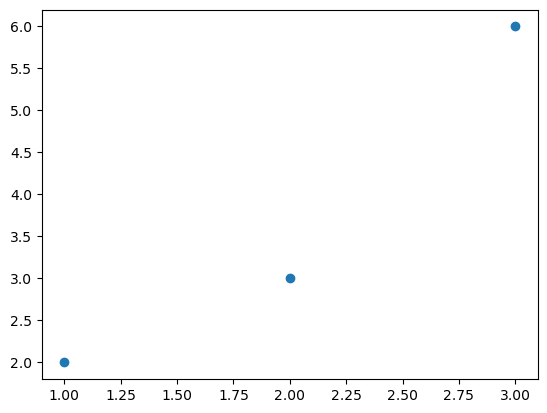

In [55]:
# Make a simple scatterplot
plt.scatter(x_train,y_train)

# check dimensions 
print(x_train.shape,y_train.shape)

<Axes: title={'center': 'A nice plot'}, xlabel='$x$', ylabel='$y$'>

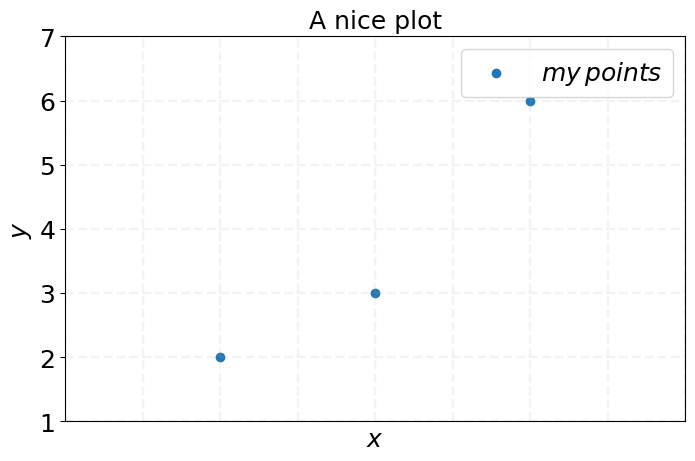

In [56]:
def nice_scatterplot(x, y, title):
    # font size
    f_size = 18
    
    # make the figure
    fig, ax = plt.subplots(1,1, figsize=(8,5)) # Create figure object

    # set axes limits to make the scale nice
    ax.set_xlim(np.min(x)-1, np.max(x) + 1)
    ax.set_ylim(np.min(y)-1, np.max(y) + 1)

    # adjust size of tickmarks in axes
    ax.tick_params(labelsize = f_size)
    
    # remove tick labels
    ax.tick_params(labelbottom=False,  bottom=False)
    
    # adjust size of axis label
    ax.set_xlabel(r'$x$', fontsize = f_size)
    ax.set_ylabel(r'$y$', fontsize = f_size)
    
    # set figure title label
    ax.set_title(title, fontsize = f_size)

    # you may set up grid with this 
    ax.grid(True, lw=1.75, ls='--', alpha=0.15)

    # make actual plot (Notice the label argument!)
    #ax.scatter(x, y, label=r'$My points$')
    #ax.scatter(x, y, label='$My points$')
    ax.scatter(x, y, label=r'$my\,points$')
    ax.legend(loc='best', fontsize = f_size);
    
    return ax

nice_scatterplot(x_train, y_train, 'A nice plot')


In [57]:
#solution
xx = np.array([[1,2,3],[4,6,8]])
xxx = xx.reshape(-1,2)
xxx.shape

(3, 2)

In [58]:
# Reshape to be a proper 2D array
x_train = x_train.reshape(x_train.shape[0], 1)
y_train = y_train.reshape(y_train.shape[0], 1)

print(x_train.shape)

(3, 1)


In [59]:
# first, compute means
y_bar = np.mean(y_train)
x_bar = np.mean(x_train)

# build the two terms
numerator = np.sum( (x_train - x_bar)*(y_train - y_bar) )
denominator = np.sum((x_train - x_bar)**2)

print(numerator.shape, denominator.shape) #check shapes

() ()


In [60]:
#slope beta1
a = numerator/denominator

#intercept beta0
b = y_bar - a * x_bar

print("The best-fit line is {0:3.2f} + {1:3.2f} * x".format(b, a))
print(f'The best fit is {b}')

The best-fit line is -0.33 + 2.00 * x
The best fit is -0.3333333333333335


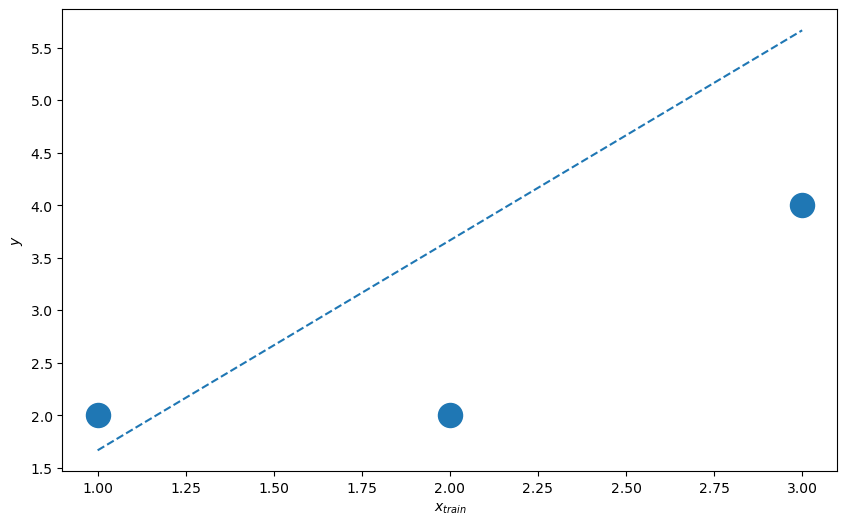

In [64]:
# %load solutions/best_fit_scatterplot.py
fig_scat, ax_scat = plt.subplots(1,1, figsize=(10,6))

# Plot best-fit line
x_train = np.array([[1, 2, 3]]).T

best_fit = b + a * x_train

ax_scat.scatter(x_train, y_train, s=300, label='Training Data')
ax_scat.plot(x_train, best_fit, ls='--', label='Best Fit Line')

ax_scat.set_xlabel(r'$x_{train}$')
ax_scat.set_ylabel(r'$y$');

In [65]:
import statsmodels.api as sm

In [66]:
# create the X matrix by appending a column of ones to x_train
X = sm.add_constant(x_train)

# this is the same matrix as in our scratch problem!
print(X)

# build the OLS model (ordinary least squares) from the training data
toyregr_sm = sm.OLS(y_train, X)

# do the fit and save regression info (parameters, etc) in results_sm
results_sm = toyregr_sm.fit()

# pull the beta parameters out from results_sm
beta0_sm = results_sm.params[0]
beta1_sm = results_sm.params[1]

print(f'The regression coef from statsmodels are: beta_0 = {beta0_sm:8.6f} and beta_1 = {beta1_sm:8.6f}')

[[1. 1.]
 [1. 2.]
 [1. 3.]]
The regression coef from statsmodels are: beta_0 = 0.666667 and beta_1 = 1.000000


In [67]:
import warnings
warnings.filterwarnings('ignore')
print(results_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     3.000
Date:                Tue, 12 Mar 2024   Prob (F-statistic):              0.333
Time:                        13:42:25   Log-Likelihood:                -2.0007
No. Observations:                   3   AIC:                             8.001
Df Residuals:                       1   BIC:                             6.199
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6667      1.247      0.535      0.6

In [68]:
from sklearn import linear_model

In [69]:
# build the least squares model
toyregr = linear_model.LinearRegression()

# save regression info (parameters, etc) in results_skl
results = toyregr.fit(x_train, y_train)

# pull the beta parameters out from results_skl
beta0_skl = toyregr.intercept_
beta1_skl = toyregr.coef_[0]

print("The regression coefficients from the sklearn package are: beta_0 = {0:8.6f} and beta_1 = {1:8.6f}".format(beta0_skl, beta1_skl))

The regression coefficients from the sklearn package are: beta_0 = 0.666667 and beta_1 = 1.000000


In [70]:
#we load the dataset (be sure that this file is in the same folder with the j. notebook)
df = pd.read_csv('Salary_dataset.csv')

In [71]:
print(df.head())

   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0


In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

print(df.head())
X = np.array(df['YearsExperience'])
y = np.array(df['Salary'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0


In [73]:
X_train


array([ 5.4,  8. ,  3. ,  5.2,  3.3,  4.6,  8.3,  6.9,  1.4, 10.6,  3.1,
        2.3,  6. ,  6.1,  3.8,  3.3,  9.1,  2.1,  1.2,  7.2,  5. ,  4.1])

In [63]:
def simple_linear_regression_fit(x_train: np.ndarray, y_train: np.ndarray) -> np.ndarray:
    """
    Inputs:
    x_train: a (num observations by 1) array holding the values of the predictor variable
    y_train: a (num observations by 1) array holding the values of the response variable

    Returns:
    beta_vals:  a (num_features by 1) array holding the intercept and slope coeficients
    """
    
    # Check input array sizes
    if len(x_train.shape) < 2:
        print("Reshaping features array.")
        x_train = x_train.reshape(x_train.shape[0], 1)

    if len(y_train.shape) < 2:
        print("Reshaping observations array.")
        y_train = y_train.reshape(y_train.shape[0], 1)

    # first, compute means
    y_bar = np.mean(y_train)
    x_bar = np.mean(x_train)

    # build the two terms
    numerator = np.sum( (x_train - x_bar)*(y_train - y_bar) )
    denominator = np.sum((x_train - x_bar)**2)
    
    #slope a
    a = numerator/denominator

    #intercept b
    b = y_bar - beta_1 *x_bar

    return np.array([b,a])

x_train = np.array([1 ,2, 3])
y_train = np.array([2, 2, 4])

coeficients = simple_linear_regression_fit(x_train, y_train)

a = coeficients[1]
b = coeficients[0]

print("The best-fit line is {1:8.6f} * x + {0:8.6f}.".format(a, b))

Reshaping features array.
Reshaping observations array.


NameError: name 'beta_1' is not defined

In [74]:
y_train

array([ 83089., 101303.,  56643.,  66030.,  64446.,  61112., 113813.,
        91739.,  46206., 121873.,  60151.,  39892.,  81364.,  93941.,
        57190.,  54446., 105583.,  43526.,  39344.,  98274.,  67939.,
        56958.])

In [75]:
# rember to reshape the X list in order to have a two dimensional array. 
# Since we have only one feature the reshape looks like below: 
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# we perform the regression
lr = LinearRegression().fit(X_train, y_train)


print(f"Linear Regression-Training set score: {lr.score(X_train, y_train):.2f}")
print(f"Linear Regression-Test set score: {lr.score(X_test, y_test):.2f}")

Linear Regression-Training set score: 0.94
Linear Regression-Test set score: 0.98


In [76]:
a = lr.coef_[0]

b = lr.intercept_ 
 
print(a, "* x +", b, "= y")

9379.710491946014 * x + 26049.72026754266 = y


In [77]:
lr.predict([[20]])

array([213643.93010646])

In [78]:
a * 20 + b

213643.93010646294

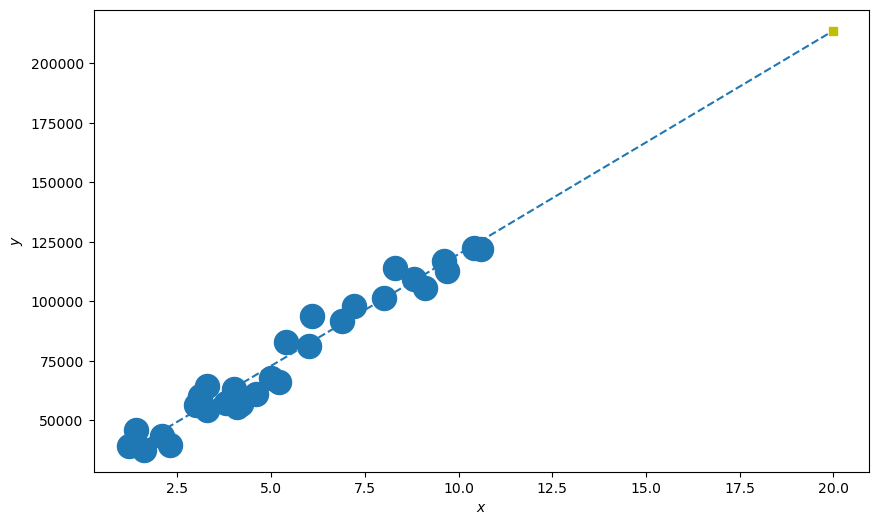

In [80]:
pred = lr.predict([[20]])
fig_scat, ax_scat = plt.subplots(1,1, figsize=(10,6))


x = X.T

best_fit = b + a * (np.append(x, [20]))

ax_scat.scatter(x, y, s=300, label='Training Data')
ax_scat.plot(np.append(x,[20]), best_fit, ls='--', label='Best Fit Line')

ax_scat.plot([20],pred, "ys", label="LinearRegression")
ax_scat.set_xlabel(r'$x$')
ax_scat.set_ylabel(r'$y$');



In [1]:
import pandas as pd
from sklearn import preprocessing
import numpy as np

data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
scaledData=data.copy()

data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")
data["TotalCharges"].fillna(data["TotalCharges"].mean(), inplace=True)

tenureColumn = data["tenure"].values.reshape(-1, 1)
tenureScaler=preprocessing.StandardScaler().fit(tenureColumn)
tenureScaled=tenureScaler.transform(tenureColumn)
scaledData["tenure"]=tenureScaled

monthlyChargeColumn=data["MonthlyCharges"].values.reshape(-1,1)
monthlyChargeScaler=preprocessing.StandardScaler().fit(monthlyChargeColumn)
monthlyChargeScaled=monthlyChargeScaler.transform(monthlyChargeColumn)
scaledData["MonthlyCharges"]=monthlyChargeScaled

totalChargeColumn=data["TotalCharges"].values.reshape(-1,1)
totalChargeScaler=preprocessing.StandardScaler().fit(totalChargeColumn)
totalChargeScaled=totalChargeScaler.transform(totalChargeColumn)
scaledData["TotalCharges"]=totalChargeScaled

columnsToEncode=["customerID","gender","SeniorCitizen","Partner","Dependents","PhoneService", "MultipleLines","InternetService", "OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod","Churn"]
enc=preprocessing.OrdinalEncoder()
X=data[columnsToEncode]
scaledData[columnsToEncode]=enc.fit_transform(X)

scaledData

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0.0,1.0,0.0,-1.277445,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,-1.160323,-0.994971,0.0
1,3962.0,1.0,0.0,0.0,0.0,0.066327,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,-0.259629,-0.173876,0.0
2,2564.0,1.0,0.0,0.0,0.0,-1.236724,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,-0.362660,-0.960399,1.0
3,5535.0,1.0,0.0,0.0,0.0,0.514251,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,-0.746535,-0.195400,0.0
4,6511.0,0.0,0.0,0.0,0.0,-1.236724,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.197365,-0.941193,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853.0,1.0,0.0,1.0,1.0,-0.340876,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,0.665992,-0.129281,0.0
7039,1525.0,0.0,0.0,1.0,1.0,1.613701,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,1.277533,2.242808,0.0
7040,3367.0,0.0,0.0,1.0,1.0,-0.870241,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,-1.168632,-0.855182,0.0
7041,5934.0,1.0,1.0,1.0,0.0,-1.155283,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.320338,-0.872777,1.0


10.013973783379312 * x + 1.4392455960044117 = y


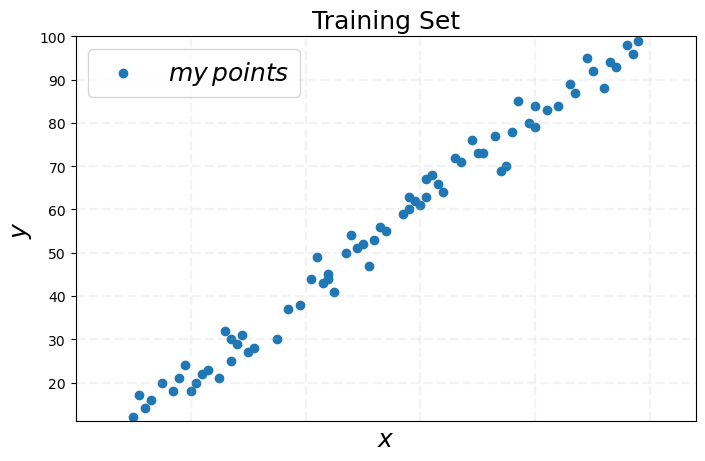

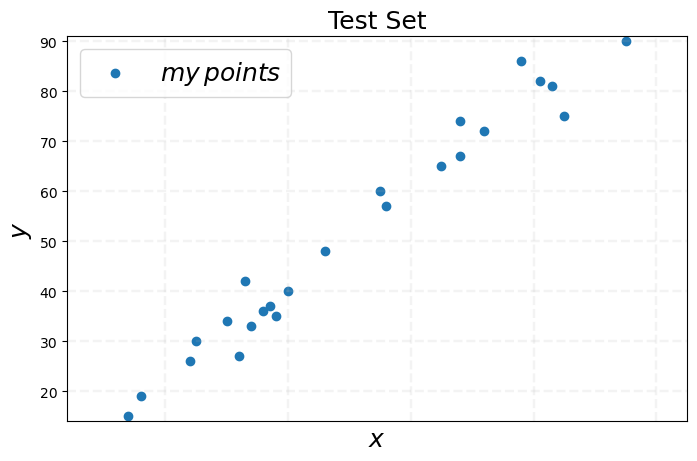

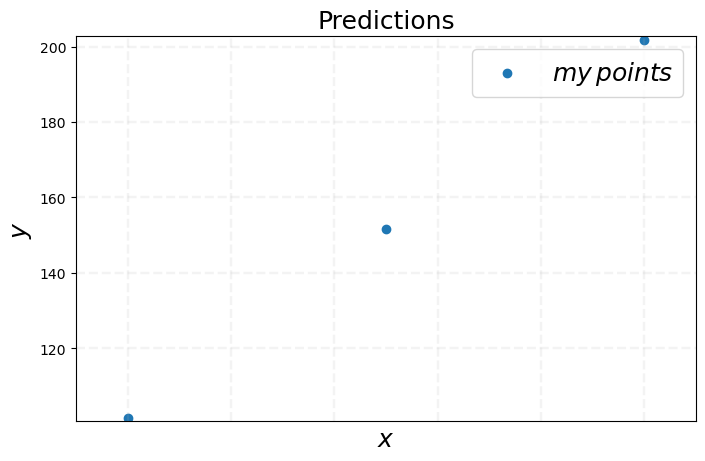

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv("score_updated.csv")

x = np.array(df['Hours'])
y = np.array(df['Scores'])
x = x.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
lr = LinearRegression().fit(X_train, y_train)

a = lr.coef_[0]
b = lr.intercept_
print(a, "* x +", b, "= y")

predictions = lr.predict([[10], [15], [20]])

def nice_scatterplot(x, y, title):
    f_size = 18
    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    ax.set_xlim(np.min(x)-1, np.max(x) + 1)
    ax.set_ylim(np.min(y)-1, np.max(y) + 1)
    ax.tick_params(labelbottom=False,  bottom=False)
    ax.set_xlabel(r'$x$', fontsize=f_size)
    ax.set_ylabel(r'$y$', fontsize=f_size)
    ax.set_title(title, fontsize=f_size)
    ax.grid(True, lw=1.75, ls='--', alpha=0.15)
    ax.scatter(x, y, label=r'$my\,points$')
    ax.legend(loc='best', fontsize = f_size);
    return ax

nice_scatterplot(X_train, y_train, 'Training Set')
nice_scatterplot(X_test, y_test, 'Test Set')
nice_scatterplot([[10], [15], [20]], predictions, 'Predictions')

plt.show()


In [118]:
df = pd.read_csv("score_updated.csv")
x = np.array(df['Hours'])
y = np.array(df['Scores'])
x = x.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.7).fit(X_train, y_train)

print(f"Ridge Regression-Training set score: {ridge.score(X_train, y_train):.2f}")
print(f"Ridge Regression-Test set score: {ridge.score(X_test, y_test):.2f}")

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0).fit(X_train, y_train)

print(f"Lasso Regression-Training set score: {lasso.score(X_train, y_train):.2f}")
print(f"Lasso Regression-Test set score: {lasso.score(X_test, y_test):.2f}")

from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.01).fit(X_train, y_train)

print(f"Elastic Net-Training set score: {elastic_net.score(X_train, y_train):.2f}")
print(f"Elastic Net-Test set score: {elastic_net.score(X_test, y_test):.2f}")

Ridge Regression-Training set score: 0.99
Ridge Regression-Test set score: 0.97
Lasso Regression-Training set score: 0.99
Lasso Regression-Test set score: 0.97
Elastic Net-Training set score: 0.99
Elastic Net-Test set score: 0.97
